In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [3]:
# Parameters
num_nodes = 100
initial_infected = 5
beta = 0.3  # Transmission rate
gamma = 0.1  # Recovery rate
steps = 50
intervention_rate = 0.1  

In [4]:
#topology creation
def create_erdos_renyi_graph(n, p):
    return nx.erdos_renyi_graph(n, p)

def create_barabasi_albert_graph(n, m):
    return nx.barabasi_albert_graph(n, m)

def create_watts_strogatz_graph(n, k, p):
    return nx.watts_strogatz_graph(n, k, p)

In [5]:
#state initialization
def initialize_states(G):
    nx.set_node_attributes(G, 'S', 'state')
    initial_infected_nodes = random.sample(G.nodes, initial_infected)
    for node in initial_infected_nodes:
        G.nodes[node]['state'] = 'I'

In [6]:
#interventions apply gareko
def apply_interventions(G, strategy='random'):
    num_interventions = int(intervention_rate * num_nodes)
    if strategy == 'random':
        nodes_to_intervene = random.sample(G.nodes, num_interventions)
    elif strategy == 'hubs':
        nodes_to_intervene = [node for node, degree in sorted(G.degree, key=lambda x: x[1], reverse=True)[:num_interventions]]
    elif strategy == 'clusters':
        clustering_coefficients = nx.clustering(G)
        nodes_to_intervene = [node for node, cc in sorted(clustering_coefficients.items(), key=lambda x: x[1], reverse=True)[:num_interventions]]
    else:
        nodes_to_intervene = []  # No interventions
    
    for node in nodes_to_intervene:
        G.nodes[node]['state'] = 'R'

In [7]:
#update states
def update_states(G):
    new_states = {}
    for node in G.nodes:
        if G.nodes[node]['state'] == 'I':
            if random.random() < gamma:
                new_states[node] = 'R'
        elif G.nodes[node]['state'] == 'S':
            neighbors = list(G.neighbors(node))
            infected_neighbors = [n for n in neighbors if G.nodes[n]['state'] == 'I']
            if infected_neighbors and random.random() < beta:
                new_states[node] = 'I'
    for node, state in new_states.items():
        G.nodes[node]['state'] = state

In [19]:
#simulation
def run_simulation(G, strategy=None):
    initialize_states(G)
    if strategy:
        apply_interventions(G, strategy)
    S, I, R = [], [], []
    for step in range(steps):
        s_count = sum(1 for node in G.nodes if G.nodes[node]['state'] == 'S')
        i_count = sum(1 for node in G.nodes if G.nodes[node]['state'] == 'I')
        r_count = sum(1 for node in G.nodes if G.nodes[node]['state'] == 'R')
        S.append(s_count)
        I.append(i_count)
        R.append(r_count)
        update_states(G)
    return S, I, R

In [20]:
#plot
def plot_results(S, I, R, title):
    %matplotlib inline
    plt.figure(figsize=(10, 6))
    plt.plot(S, label='Susceptible', color='blue') #susceptible curve
    plt.plot(I, label='Infected', color='red') #infected curve
    plt.plot(R, label='Recovered', color='green') #recovered curve
    plt.xlabel('Time Steps')
    plt.ylabel('Number of Nodes')
    plt.title(title)
    plt.legend()
    plt.show()

In [21]:
#graph creation
G_erdos_renyi = create_erdos_renyi_graph(num_nodes, 0.1)
G_barabasi_albert = create_barabasi_albert_graph(num_nodes, 2)
G_watts_strogatz = create_watts_strogatz_graph(num_nodes, 4, 0.1)

Erdős–Rényi (Random Graph) Simulation Without Interventions:


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1104\1999192613.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  initial_infected_nodes = random.sample(G.nodes, initial_infected)


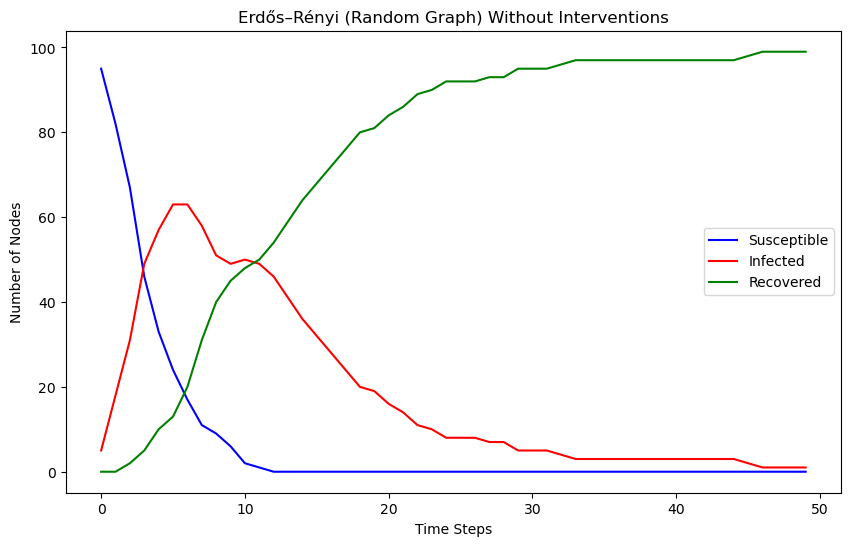

Barabási–Albert (Scale-Free Network) Simulation Without Interventions:


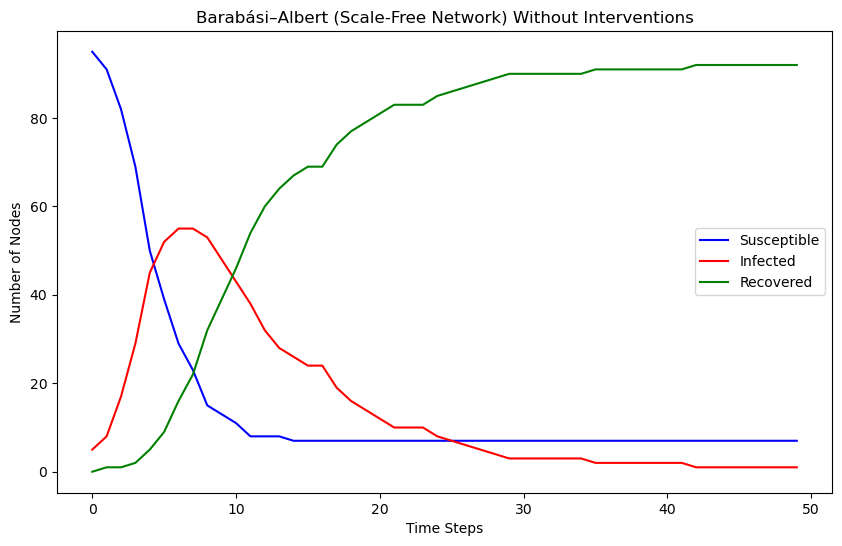

Watts–Strogatz (Small-World Network) Simulation Without Interventions:


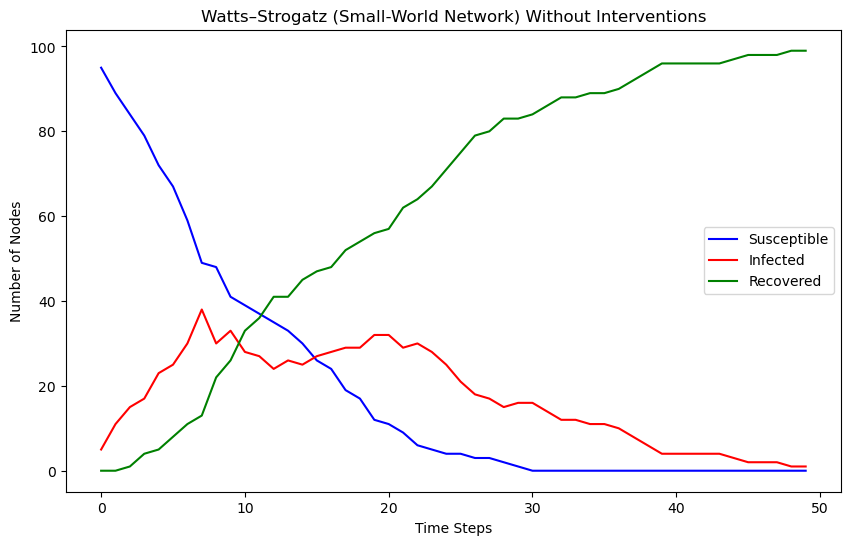

In [22]:
# Simulation without interventions
print("Erdős–Rényi (Random Graph) Simulation Without Interventions:")
S, I, R = run_simulation(G_erdos_renyi.copy(), strategy=None)
plot_results(S, I, R, "Erdős–Rényi (Random Graph) Without Interventions")

print("Barabási–Albert (Scale-Free Network) Simulation Without Interventions:")
S, I, R = run_simulation(G_barabasi_albert.copy(), strategy=None)
plot_results(S, I, R, "Barabási–Albert (Scale-Free Network) Without Interventions")

print("Watts–Strogatz (Small-World Network) Simulation Without Interventions:")
S, I, R = run_simulation(G_watts_strogatz.copy(), strategy=None)
plot_results(S, I, R, "Watts–Strogatz (Small-World Network) Without Interventions")

Erdős–Rényi (Random Graph) Simulation With Random Interventions:


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1104\1999192613.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  initial_infected_nodes = random.sample(G.nodes, initial_infected)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1104\2767816322.py:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nodes_to_intervene = random.sample(G.nodes, num_interventions)


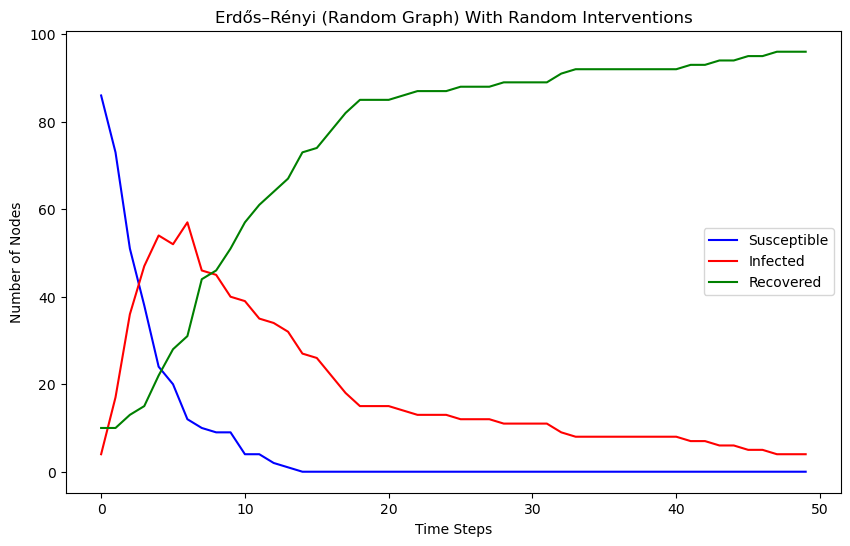

Barabási–Albert (Scale-Free Network) Simulation With Random Interventions:


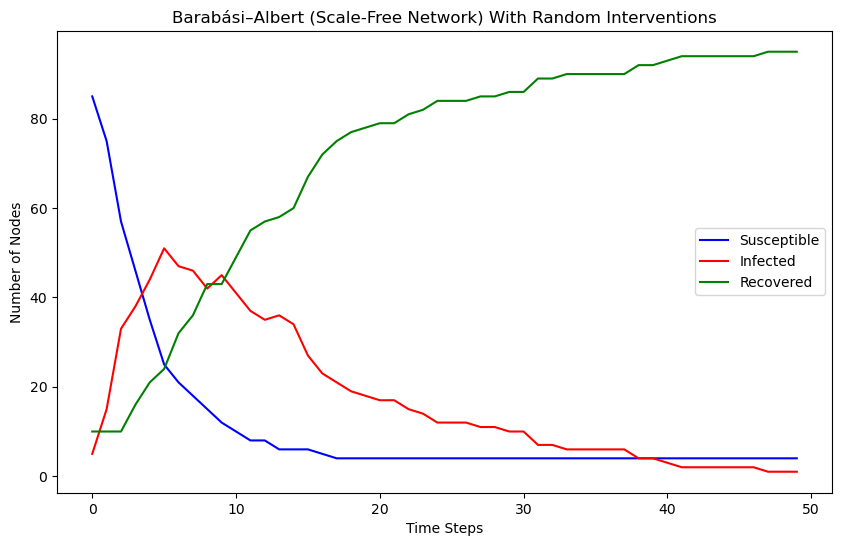

Watts–Strogatz (Small-World Network) Simulation With Random Interventions:


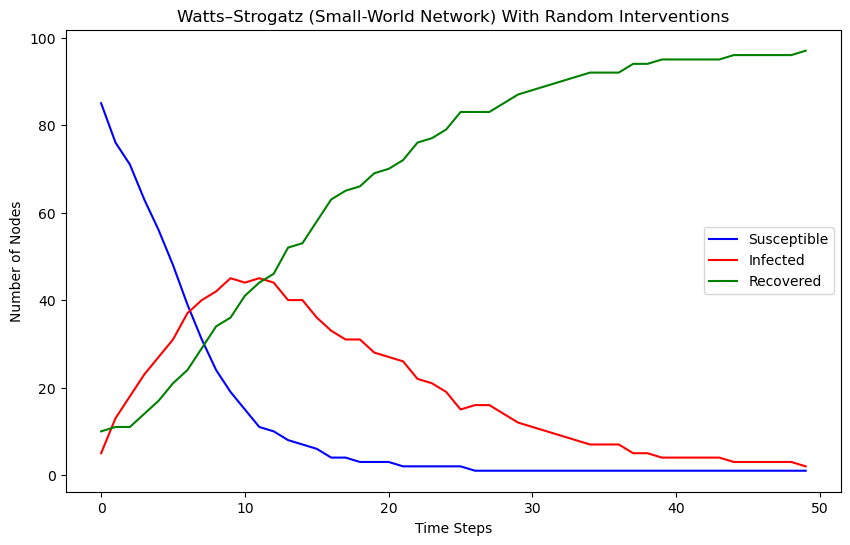

In [23]:
# Simulation with random interventions
print("Erdős–Rényi (Random Graph) Simulation With Random Interventions:")
S, I, R = run_simulation(G_erdos_renyi.copy(), strategy='random')
plot_results(S, I, R, "Erdős–Rényi (Random Graph) With Random Interventions")

print("Barabási–Albert (Scale-Free Network) Simulation With Random Interventions:")
S, I, R = run_simulation(G_barabasi_albert.copy(), strategy='random')
plot_results(S, I, R, "Barabási–Albert (Scale-Free Network) With Random Interventions")

print("Watts–Strogatz (Small-World Network) Simulation With Random Interventions:")
S, I, R = run_simulation(G_watts_strogatz.copy(), strategy='random')
plot_results(S, I, R, "Watts–Strogatz (Small-World Network) With Random Interventions")

Erdős–Rényi (Random Graph) Simulation With Hub Interventions:


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1104\1999192613.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  initial_infected_nodes = random.sample(G.nodes, initial_infected)


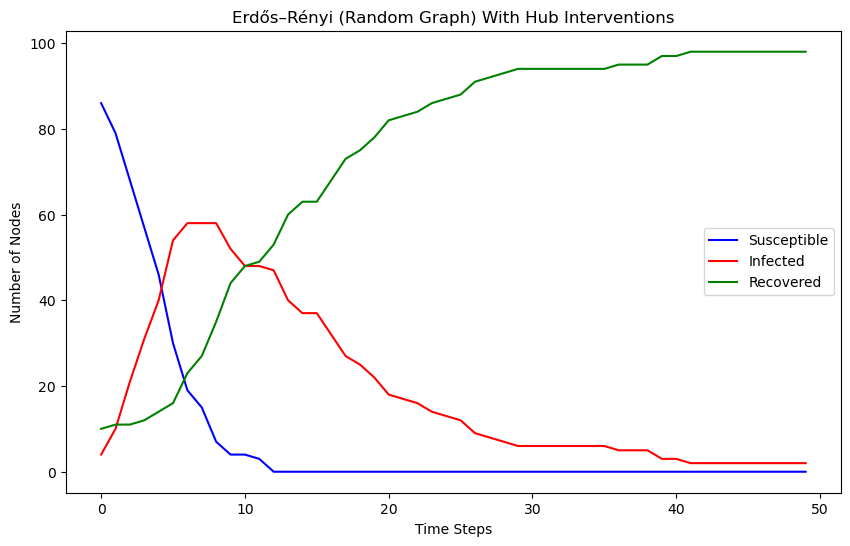

Barabási–Albert (Scale-Free Network) Simulation With Hub Interventions:


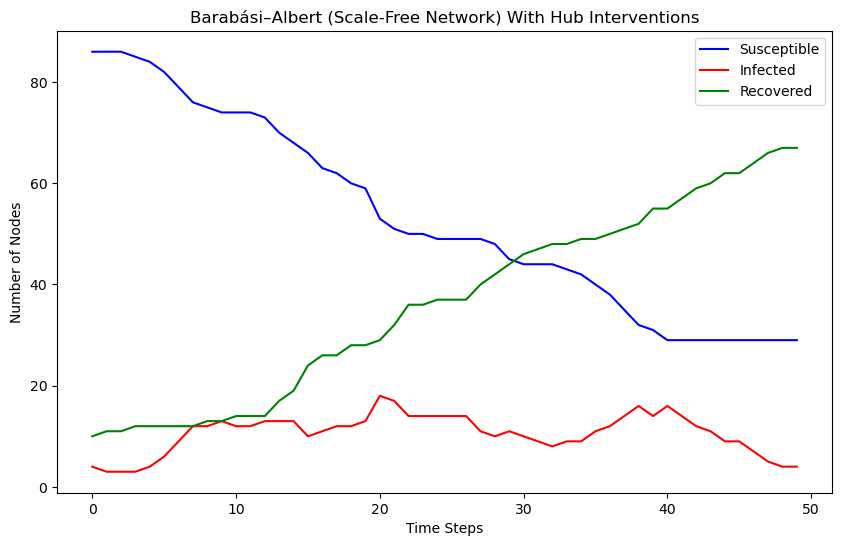

Watts–Strogatz (Small-World Network) Simulation With Hub Interventions:


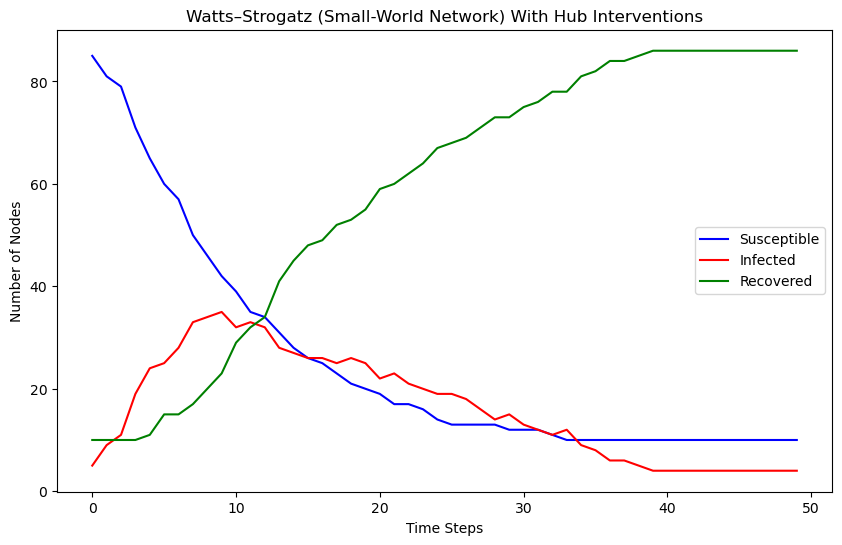

In [24]:
# Simulation with hub interventions
print("Erdős–Rényi (Random Graph) Simulation With Hub Interventions:")
S, I, R = run_simulation(G_erdos_renyi.copy(), strategy='hubs')
plot_results(S, I, R, "Erdős–Rényi (Random Graph) With Hub Interventions")

print("Barabási–Albert (Scale-Free Network) Simulation With Hub Interventions:")
S, I, R = run_simulation(G_barabasi_albert.copy(), strategy='hubs')
plot_results(S, I, R, "Barabási–Albert (Scale-Free Network) With Hub Interventions")

print("Watts–Strogatz (Small-World Network) Simulation With Hub Interventions:")
S, I, R = run_simulation(G_watts_strogatz.copy(), strategy='hubs')
plot_results(S, I, R, "Watts–Strogatz (Small-World Network) With Hub Interventions")

Erdős–Rényi (Random Graph) Simulation With Cluster Interventions:


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1104\1999192613.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  initial_infected_nodes = random.sample(G.nodes, initial_infected)


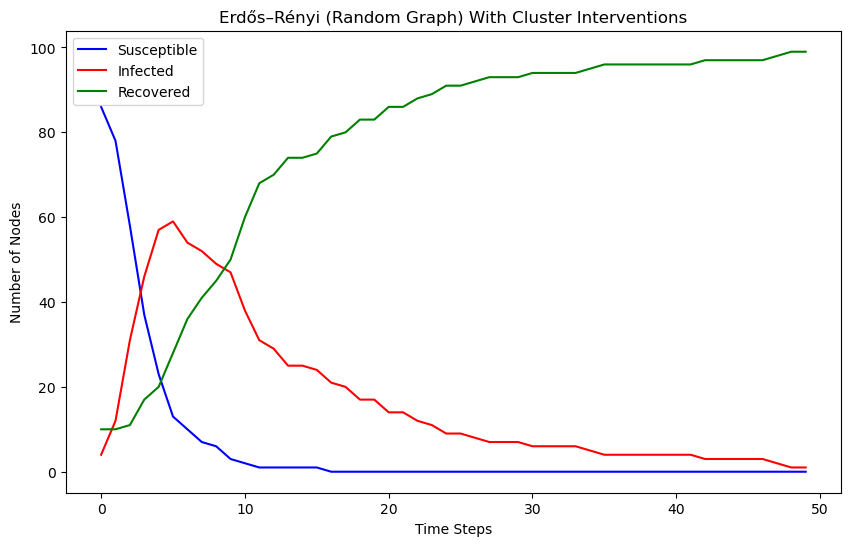

Barabási–Albert (Scale-Free Network) Simulation With Cluster Interventions:


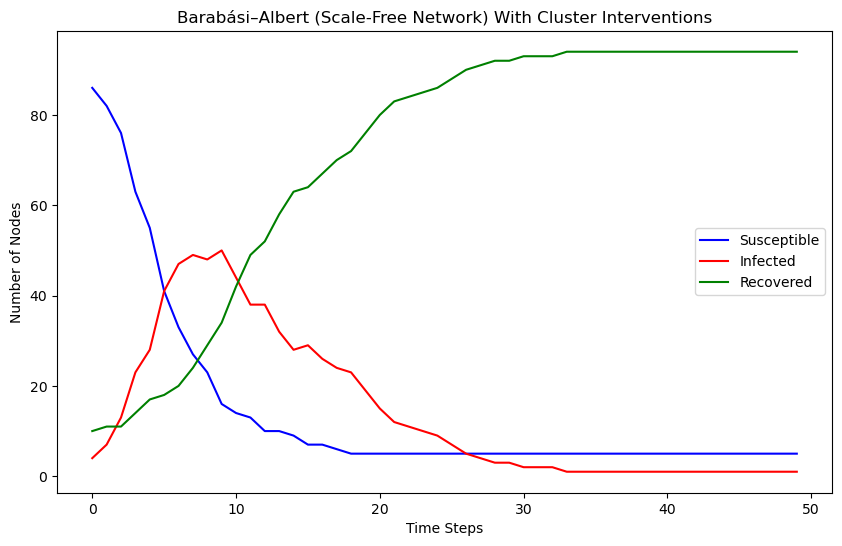

Watts–Strogatz (Small-World Network) Simulation With Cluster Interventions:


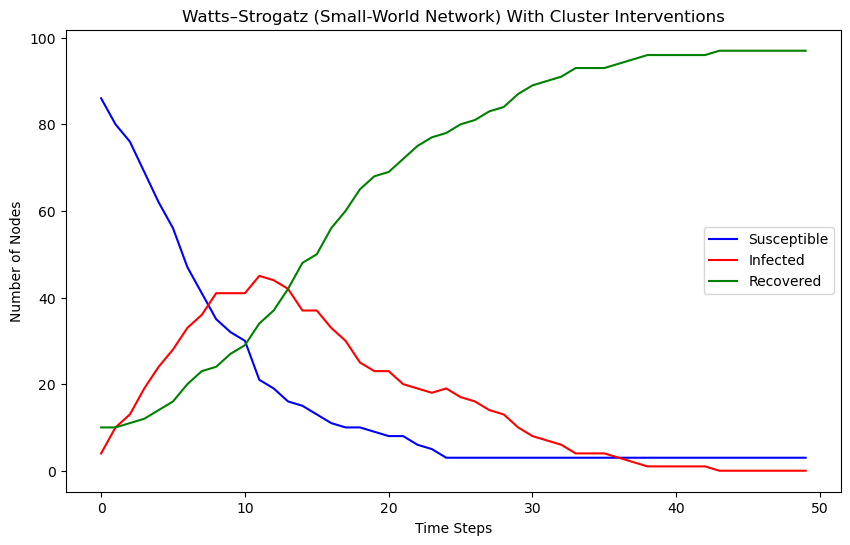

In [25]:
# Simulation with cluster interventions
print("Erdős–Rényi (Random Graph) Simulation With Cluster Interventions:")
S, I, R = run_simulation(G_erdos_renyi.copy(), strategy='clusters')
plot_results(S, I, R, "Erdős–Rényi (Random Graph) With Cluster Interventions")

print("Barabási–Albert (Scale-Free Network) Simulation With Cluster Interventions:")
S, I, R = run_simulation(G_barabasi_albert.copy(), strategy='clusters')
plot_results(S, I, R, "Barabási–Albert (Scale-Free Network) With Cluster Interventions")

print("Watts–Strogatz (Small-World Network) Simulation With Cluster Interventions:")
S, I, R = run_simulation(G_watts_strogatz.copy(), strategy='clusters')
plot_results(S, I, R, "Watts–Strogatz (Small-World Network) With Cluster Interventions")